In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [2]:
df = pd.read_csv('europaFinal.csv')

In [26]:
df.head(20)

,level_0,index,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,beginning,end,progressive
0,8,227,15,13.0,Villarreal,116.40,77.44,FirstHalf,Pass,Successful,5.0,112.32,39.24,37.612679,7.717513,True
1,11,315,21,29.0,Villarreal,119.64,79.44,FirstHalf,Pass,Unsuccessful,5.0,114.24,62.88,39.441643,23.593898,True
2,12,321,22,15.0,Villarreal,119.40,0.40,FirstHalf,Pass,Unsuccessful,5.0,111.36,38.28,39.604545,8.809540,True
3,15,432,28,52.0,Villarreal,81.36,58.56,FirstHalf,Pass,Successful,5.0,110.64,53.40,42.866341,16.345323,True
4,24,773,47,4.0,Villarreal,119.40,79.60,FirstHalf,Pass,Unsuccessful,5.0,114.24,61.08,39.604545,21.852780,True
5,27,833,47,38.0,Villarreal,99.60,5.44,SecondHalf,Pass,Successful,5.0,92.52,32.88,40.131703,28.387406,True
6,42,1416,82,48.0,Villarreal,71.76,56.40,SecondHalf,Pass,Unsuccessful,5.0,109.08,56.04,50.951522,19.404329,True
7,43,1496,91,31.0,Villarreal,74.04,59.12,SecondHalf,Pass,Unsuccessful,5.0,109.08,41.04,49.778469,10.969412,True
8,50,1677,97,24.0,Villarreal,86.40,54.80,FirstPeriodOfExtraTime,Pass,Unsuccessful,5.0,116.16,40.68,36.715120,3.899744,True
9,53,1724,101,28.0,Villarreal,96.12,71.68,FirstPeriodOfExtraTime,Pass,Unsuccessful,5.0,116.88,50.52,39.672116,10.972912,True


In [4]:
df = df.loc[df['teamId']=='Villarreal']

In [6]:
df = df.loc[df['type']=='Pass']

In [19]:
df = df.loc[df['playerId']==5.0].reset_index()

In [23]:
df = df.loc[df['progressive']==True].reset_index()

In [12]:
df.x = df.x*1.2
df.y = df.y*.8
df.endX = df.endX*1.2
df.endY = df.endY*1.2

In [21]:
df['beginning'] = np.sqrt(np.square(120-df['x']) + np.square(40 - df['y']))
df['end'] = np.sqrt(np.square(120 - df['endX']) + np.square(40 - df['endY']))

df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]

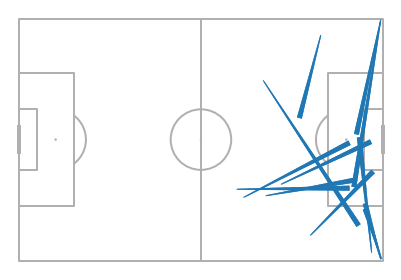

In [28]:
pitch = Pitch(pitch_type='statsbomb')
fig,ax = pitch.draw()

pitch.lines(df.x,df.y,df.endX,df.endY,comet=True,ax=ax)